# NLP 2024
# Lab 3: Attention and Pre-trained Models

Our practical journey in NLP has so far covered the following:
- Lab 1: Train a bag-of-words model (with variations): In that case, we learned word meanings from the data itself.
- Lab 2: Train an embedding-based model: We still learn from the data itself but hopefully with more effective ways to capture semantics and context.
- Lab 2: Use pre-trained embeddings: We still learn from the data, and pre-training helps generalize.

Now, it's time to not only use a set of pre-trained word vectors (aka representations) but to also use a pre-trained model (like BERT). The model is pre-trained on vast amounts of data and that allows for better generalization. At the same, as we discussed in class, BERT models are based on transformers, which use attention to model sequences (in our case sequences of words). BERT provides for contextualized embeddings, aka the embeddding vector of a word is only determined once the actual context of that word is known: Practically, this allows for words to have different embedding vectors depending on their actual context (e.g. think of the word "bank" and it's multiple meanings in different contexts).

In this lab, we will learn how to load and use pre-trained models (e.g. BERT) from Huggingface. We will be using the same dataset/task as the previous lab, also for comparison reasons.

By the end of this lab you should be able to:

- Load and/or use pre-trained models and tokenizers to solve different NLP tasks
- Inspect and analyze the innter workings (hidden layers etc.) of attention models (like BERT)
- Use attention models to get sentence representations (aka sentence embeddings)
- Use BERT sentence embeddings to solve more complicated tasks like information retrieval
- Compare performance of differemt models on different NLP tasks and assess their effectiveness
- Load and use the basics of `pytorch` (important framework in NLP)

### Score breakdown

| Exercise            | Points |
|---------------------|--------|
| [Exercise 1](#e1)   | 3      |
| [Exercise 2](#e2)   | 3      |
| [Exercise 3](#e3)   | 10     |
| [Exercise 4](#e4)   | 5      |
| [Exercise 5](#e5)   | 5      |
| [Exercise 6](#e6)   | 3      |
| [Exercise 7](#e7)   | 3      |
| [Exercise 8](#e8)   | 3      |
| [Exercise 9](#e9)   | 5      |
| [Exercise 10](#e10) | 5      |
| [Exercise 11](#e11) | 5      |
| [Exercise 12](#e12) | 10     |
| [Exercise 13](#e12) | 10     |
| Total               | 70     |

This score will be scaled down to 1 and that will be your final lab score.

### Instructions for delivery (Deadline: 31/May late night, wildcards possible)

+ Make sure that you include a proper amount/mix of comments, results and code.
+ In the end, make sure that all cells are executed properly and everything you need to show is in your (execucted) notebook.
+ You are asked to deliver only your executed notebook file, .ipnyb and nothing else. Enjoy!
+ Honor code applies to these tasks. Only individual work should be submitted.
+ While you may talk with others about this lab, we ask that you write your solutions individually. If you do discuss specific tasks with others please include their names below.
+ It is mandatory to list and disclose any website (or other resource) you used (e.g. stackoverflow) as well as any genAI tools (e.g. chatGPT) used.

Collaborators: list collaborators here

**I talked with Jerry about...**

Use of genAI tools (e.g. chatGPT), websites (e.g. stackoverflow): list websites where you found code (or other info) as well as include information on how you used genAI tools (e.g. prompts):

I asked chatGPT about...

## 0. Setup (Huggingface + PyTorch  = ❤️)

You should know the drill by now. As in the last lab, we will be using huggingface datasets library ([https://huggingface.co/datasets](https://huggingface.co/datasets)). You can find the detailed documentation and tutorials here: [https://huggingface.co/docs/datasets/en/index](https://huggingface.co/docs/datasets/en/index)

If you don't have it installed you can run the code below:

In [55]:
! pip install -U datasets~=2.18.0

Next, we will need [PyTorch](https://pytorch.org/) installed. It is a very popular deep learning library that offers modularized versions of many of the sequence models we discussed in class. It's an important tool that you may want to practice further if you want to dive deeper into NLP, since much of the current academic and industrial research uses it.

Some resources to look further are given below.

* [Documentation](https://pytorch.org/docs/stable/index.html) (We will need this soon)

* [Installation Instructions](https://pytorch.org/get-started/locally/)

* [Quickstart Tutorial](https://pytorch.org/tutorials/beginner/basics/quickstart_tutorial.html)

The cell below should install the library:

In [56]:
! pip install torch torchvision torchaudio

The last bit we need is the huggingface transformers library (here is the documentation [https://huggingface.co/docs/transformers/en/index](https://huggingface.co/docs/transformers/en/index)). Transformers are one of the most influential architectures in handling sequences (not only in language). As we discussed in lectures, they excel at taking into account context (which is the salt-and-pepper of NLP) with mechansisms such as self-attetion, which allows them to weigh the importance of different words in a sentence. If you want to know more, revisit the course material (slides and textbook).

We already used huggingface datasets in previous labs and huggingface transformers integrates nicely with that. Apart from the ease of use, huggingface is also providing pre-trained models of different kinds. The list can be found [here](https://huggingface.co/models) ([https://huggingface.co/models](https://huggingface.co/models)). The following line should be enough to install huggingface transformers library:

In [57]:
! pip install transformers~=4.30.2

As usual, we start by importing some essential Python libraries that we will be using.

In [58]:
import math

import numpy as np
import matplotlib.pyplot as plt
import datasets
import transformers
import tqdm
import torch

## 1. Load and Preprocess Data

For easiness and comparison purposes, we will ue the same dataset as in the previous lab. That will help us re-visit the approach and see whether contextualized architectures can do better in the same problem/task/dataset.

As a reminder:

*Sentence compression* involves rephrasing sentences to make them shorter while still retaining the original meaning. A reliable compression system would be valuable for mobile devices and could also serve as a component in an extractive summarization system.

The dataset we are going to use can be found on [Huggingface](https://huggingface.co/datasets/embedding-data/sentence-compression). It concerns a set of 180,000 pairs of sentences, aka it is a parallel corpus of sentences and their equivalent compressions. It has been collected by harvesting news articles from the Internet where the headline appears to be similar to the first sentence and that property is used to find an "extractive" compression of the sentence.

For example, for the sentence

`"Regulators Friday shut down a small Florida bank, bringing to 119 the number of US bank failures this year amid mounting loan defaults"`

the compressed equivalent (based on the dataset) is:

`"Regulators shut down small Florida bank"`.


For more information you can read the original paper (from Google) [here](https://aclanthology.org/D13-1155.pdf). If you haven't done so for Lab 2, we strongly recommend going over the paper to gain further insights

### 1.1 Loading the Dataset

The dataset will be loaded as a huggingface datgaset. This may take a few minutes because of the large size of the data.

Make sure to inspect the dataset and make sure it is imported properly.

In [59]:
ds = datasets.load_dataset('embedding-data/sentence-compression')
print(ds)

DatasetDict({
    train: Dataset({
        features: ['set'],
        num_rows: 180000
    })
})


In [60]:
for i in range(10):
    print(ds['train'][i])

{'set': ["The USHL completed an expansion draft on Monday as 10 players who were on the rosters of USHL teams during the 2009-10 season were selected by the League's two newest entries, the Muskegon Lumberjacks and Dubuque Fighting Saints.", 'USHL completes expansion draft']}
{'set': ['Major League Baseball Commissioner Bud Selig will be speaking at St. Norbert College next month.', 'Bud Selig to speak at St. Norbert College']}
{'set': ["It's fresh cherry time in Michigan and the best time to enjoy this delicious and nutritious fruit.", "It's cherry time"]}
{'set': ['An Evesham man is facing charges in Pennsylvania after he allegedly dragged his girlfriend from the side of his pickup truck on the campus of Kutztown University in the early morning hours of Dec. 5, police said.', 'Evesham man faces charges for Pa.']}
{'set': ["NRT LLC, one of the nation's largest residential real estate brokerage companies, announced several executive appointments within its Coldwell Banker Residential B

The dataset comes with a `train` split so we will have to split that into `train`/`test` ourselves with the line below.

In [61]:
split_ds = ds['train'].train_test_split(test_size=0.2)
print(split_ds)

DatasetDict({
    train: Dataset({
        features: ['set'],
        num_rows: 144000
    })
    test: Dataset({
        features: ['set'],
        num_rows: 36000
    })
})


### 1.2 Preprocessing the dataset

In this section we will prepare the dataset. Note that previously, we had very much full control over the vocabulary of the dataset (in terms of pre-processing including tokenization). That is because we wanted to build our own embedding model.

By using a *pre-trained* model (like we are going to do at this lab), we need to adhere to the way this model was trained (including the tokenization). Huggingface provides the models, along with the relevant tokenizers, therefore cleaning is not necessary (as in previous labs). You can still include it if you think this would improve the results of the retrieval in the later parts of the lab.

<a name='e1'></a>
### Exercise 1 (3 points)
Instead of cleaning, we will unpack the `set` (containing tuples of full and compressed sentences) column into separate `sentence` and `compressed` columns. This will make it a bit easier for us later.

One key difference in this function is the fact that it will accept a batch of examples (instead of a single example in the exercises in the previous lab). You can iterate through the examples this way:

```
for set in examples['set']
```

The new columns should be lists containing strings (full or compressed sentences) extracted from the `set` column.

Fill in the function below to complete this task

In [62]:
def unpack(examples):
    """
    Unpacks the column `set` into two columns `sentence` and `compressed`.
    Args:
        examples: a batch of examples from the dataset

    Returns: modified examples with two new columns: `sentence` and `compressed`

    """
    sentences = []
    compressed_sentences = []

    ### YOUR CODE HERE

    for set_item in examples['set']:
        full_sentence, compressed_sentence = set_item
        sentences.append(full_sentence)
        compressed_sentences.append(compressed_sentence)


    ### YOUR CODE ENDS HERE

    examples['sentence'] = sentences
    examples['compressed'] = compressed_sentences
    return examples

In the next cell, we will apply the `unpack` function to the whole dataset. Notice that we also drop the original `set` column.

In [63]:
split_ds = split_ds.map(unpack, batched=True, remove_columns=['set'])
print(split_ds)

Map:   0%|          | 0/144000 [00:00<?, ? examples/s]

Map:   0%|          | 0/36000 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['sentence', 'compressed'],
        num_rows: 144000
    })
    test: Dataset({
        features: ['sentence', 'compressed'],
        num_rows: 36000
    })
})


Let's examine some examples from the dataset and make sure that we got the results we wanted.

In [64]:
for i in range(10):
    print(split_ds['train'][i])

{'sentence': "Javelin accused denied bail Updated: 00:18, Thursday January 17, 2013 A boy accused of hurling a metal pole like a javelin at another youth after trying to gatecrash a party may have been 'fingered' by others involved in the incident, a Sydney court has heard.", 'compressed': 'Javelin accused denied bail'}
{'sentence': "The basic state pension would need to double in order to provide a 'comfortable' retirement, yet UK adults still remain reluctant to top up their retirement savings, research by Friends Provident found.", 'compressed': 'State pension needs to double'}
{'sentence': 'The AfDB and Kenya have signed loan agreements on the Farm Infrastructure and Rural Livelihoods Restoration Project and the Mombasa-Nairobi Transmission Line Project.', 'compressed': 'AfDB and Kenya sign loan agreements'}
{'sentence': 'Sonny Bill Williams will return to the NRL in 2013 after a stint playing Japanese club rugby.', 'compressed': 'Sonny Bill Williams to return to NRL'}
{'sentence':

In this lab, we will be using only pre-trained models. That means that we won't be training any new model. This is the reason we can select only the `test` subset for the rest of the notebook (this is where we will be assessing the performance of the pre-trained models). At the same time, we will save much time, as we will not be processing the `train` subset.

In [65]:
test_ds = split_ds['test']
print(test_ds)

Dataset({
    features: ['sentence', 'compressed'],
    num_rows: 36000
})


### 1.3 Loading the Tokenizer

For the first part of this lab, we will be using a pre-trained BERT model from Huggingface, namely the [BERT Uncased](https://huggingface.co/google-bert/bert-base-uncased). You can read the original paper that introduced this model [here](https://aclanthology.org/N19-1423.pdf). This paper has been once of the most cited papers ever (currently having more than 100,000 citations).

We will specify the model name that can be found on the model's card on huggingface (revisit the first link). Make sure to check what other information Huggingface is offering (e.g. how to use the model, limitations, how to inference, etc.).

In [66]:
model_name = 'google-bert/bert-base-uncased'

The models on huggingface come with their own tokenizers. They are loaded separately from the models. We can use [AutoTokenizer](https://huggingface.co/docs/transformers/v4.40.2/en/model_doc/auto#transformers.AutoTokenizer)'s `from_pretrained()` method to load it.

Inspect the output: The loaded object is of `BertTokenizerFast` class. Check the documentation [here](https://huggingface.co/docs/transformers/model_doc/bert#transformers.BertTokenizerFast).

* What is the vocabulary size?

* What are the special tokens and their functions?

Check the original paper to know more and discuss also with your TAs.

In [67]:
tokenizer = transformers.AutoTokenizer.from_pretrained(model_name)
print(tokenizer)

BertTokenizerFast(name_or_path='google-bert/bert-base-uncased', vocab_size=30522, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True)


Next, let's see how we can use it to tokenize some text.

In [68]:
print(test_ds[0]['sentence'])
tokenized = tokenizer(test_ds[0]['sentence'], padding=True, return_tensors='pt')
print("---")
print(type(tokenized))
print("---")
print(tokenized)

Middle class people use sophisticated comedy to assert cultural superiority according to a study which argues that social background determines what people in Britain find funny.
---
<class 'transformers.tokenization_utils_base.BatchEncoding'>
---
{'input_ids': tensor([[  101,  2690,  2465,  2111,  2224, 12138,  4038,  2000, 20865,  3451,
         19113,  2429,  2000,  1037,  2817,  2029,  9251,  2008,  2591,  4281,
         16463,  2054,  2111,  1999,  3725,  2424,  6057,  1012,   102]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1]])}


Examine the outputs: The tokenizer returned three things:
- `input_ids` - this is a PyTorch tensor ([https://pytorch.org/docs/stable/tensors.html](https://pytorch.org/docs/stable/tensors.html)) with the indices of our tokens. PyTorch tensors are similar to numpy arrays. They hold data in a multidimensional array or matrix. The difference is that PyTorch tensors can be placed and modified on the GPU which greatly improves the speed of execution.
- `token_type_ids` - this tensor holds the information about the index of the sentence. This has to do with the classification objective from the original paper, where two sentences were given and the model had to predict if they are connected. Because we only included a single sentence, we have only zeros here. We will not be concerned with it in this lab.
- `attention_mask` - holds the mask that the model will use to determine if the tokens in the `input_ids` are the real tokens or *padding*. Padding is a technique used to ensure that all input sequences have the same length. BERT (like many other NLP models) process data in batches and requires each sequence in a batch to have the same length, so sequences that are shorter than the maximum sequence length in the batch are padded with special tokens. In this case, because we only inputted a single sentence, the mask contains only ones. Later you will see examples where this is not the case.

Let's see how exactly the sentence was tokenized and how we can retrieve the original text. Notice that some words have been split into multiple tokens (remember when we discussed sub-word tokenization in class?). Also pay attention to the added special tokens, namely `CLS` and `SEP`:

The `[CLS]` token is a special classification token added at the beginning of every input sequence. It stands for "classification" (daah!) and is used by BERT to aggregate information from the entire sequence. The final hidden state corresponding to this token (after passing through the transformer layers) is used as the aggregate sequence representation for classification tasks. We will use this later in the lab!

The `[SEP]` token is used to separate different segments or sentences within the input sequence. It stands for "separator" (daaah again!).

In [69]:
print(tokenized['input_ids'].shape)
print("---")
print(tokenizer.convert_ids_to_tokens(tokenized['input_ids'][0]))
print("---")
print(len(tokenizer.convert_ids_to_tokens(tokenized['input_ids'][0])))
print("---")
print(tokenizer.decode(tokenized['input_ids'][0]))
print("---")
print(tokenizer.decode(tokenized['input_ids'][0], skip_special_tokens=True))

torch.Size([1, 29])
---
['[CLS]', 'middle', 'class', 'people', 'use', 'sophisticated', 'comedy', 'to', 'assert', 'cultural', 'superiority', 'according', 'to', 'a', 'study', 'which', 'argues', 'that', 'social', 'background', 'determines', 'what', 'people', 'in', 'britain', 'find', 'funny', '.', '[SEP]']
---
29
---
[CLS] middle class people use sophisticated comedy to assert cultural superiority according to a study which argues that social background determines what people in britain find funny. [SEP]
---
middle class people use sophisticated comedy to assert cultural superiority according to a study which argues that social background determines what people in britain find funny.


Tokenizer can process a list of sentences. This will create a batched output with tensor's first dimension corresponding to the batch size (the number of sentences we passed to the tokenizer). Examine the following cell and make sure it makes sense to you.

In [70]:
print(test_ds[0:3]['sentence'])
tokenized = tokenizer(test_ds[0:3]['sentence'], padding=True, return_tensors='pt')
print(tokenized)
print(tokenized['input_ids'].shape)
print(tokenizer.convert_ids_to_tokens(tokenized['input_ids'][0]))
print(len(tokenizer.convert_ids_to_tokens(tokenized['input_ids'][0])))
print(tokenizer.decode(tokenized['input_ids'][0]))
print(tokenizer.decode(tokenized['input_ids'][0], skip_special_tokens=True))

['Middle class people use sophisticated comedy to assert cultural superiority according to a study which argues that social background determines what people in Britain find funny.', 'Nearly a year after her local debut, singer/songwriter Brandi Carlile will return to the Fargo Theatre on Aug. 16.', 'Syrian President Bashar al-Assad could be offered immunity from prosecution in the International Criminal Court and safe passage out of his country in a bid to end the ongoing violence, it has been reported.']
{'input_ids': tensor([[  101,  2690,  2465,  2111,  2224, 12138,  4038,  2000, 20865,  3451,
         19113,  2429,  2000,  1037,  2817,  2029,  9251,  2008,  2591,  4281,
         16463,  2054,  2111,  1999,  3725,  2424,  6057,  1012,   102,     0,
             0,     0,     0,     0,     0,     0,     0,     0,     0,     0,
             0,     0],
        [  101,  3053,  1037,  2095,  2044,  2014,  2334,  2834,  1010,  3220,
          1013,  6009,  4435,  2072,  5529,  9463,  209

### 1.4 Loading the Model

In this section, we will load and examine the model. We will start with selecting the device we will place the model on. This will be a GPU (if one is available) or a CPU.

Google Colab offers free access to GPU, provided there is availability (also baed on quotas which may vary based on your usage and the overall demand on Colab's resources). If you are working locally, then if you don't have a GPU, CPU will be selected. For the first parts of the assignment running on CPU might be okay but when we have to load the dataset a GPU will be necessary.

The following cell will select the device for us.

In [71]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
print(f'Device: {device}')

Device: cuda:0


Now, let's load the model from huggingface and place it (slowly because it's heavy due to the large number of parameters) on the device from the previous cell (the methods `to()`).

In [72]:
model = transformers.AutoModel.from_pretrained(model_name)
model.to(device)
print(model)

Some weights of the model checkpoint at google-bert/bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False)
  

<a name='e2'></a>
### Exercise 2 (3 points)

Examine the output of the previous cell. Answer the following questions:
- What is the number of transformer layers in this model?
- What is the dimension of the embeddings?
- What is the hidden size of the FFN in the transformer layer?
- What is the total number of parameters of the model (hint: check the `num_parameters()` method of the model)?

In [73]:
num_params = model.num_parameters()
print(f"Total number of parameters in the model: {num_params}")

Total number of parameters in the model: 109482240


// your answers here

1. There are 12 ((0-11): 12 x BertLayer) transformer layers.
2. The dimension (in and out features) of the embedding is 768.
3. The hidden size of the FFN is 3072.
   **(intermediate): BertIntermediate(**
          **(dense): Linear(in_features=768, out_features=3072, bias=True)**
          **(intermediate_act_fn): GELUActivation()**
    
4. Number of parameters: 109482240

Next, let's use BERT model for inference. We will tokenize the first sentence of our dataset and pass it to the model. We set `output_hidden_states` to `True` in order to have access to the hidden states of the model. Those represent the latent representations after embedding and transformer layers.

In [74]:
tokenized = tokenizer(test_ds[0]['sentence'], padding=True, return_tensors='pt').to(device)
print(tokenized)
model_output = model(**tokenized, output_hidden_states=True)

{'input_ids': tensor([[  101,  2690,  2465,  2111,  2224, 12138,  4038,  2000, 20865,  3451,
         19113,  2429,  2000,  1037,  2817,  2029,  9251,  2008,  2591,  4281,
         16463,  2054,  2111,  1999,  3725,  2424,  6057,  1012,   102]],
       device='cuda:0'), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0]], device='cuda:0'), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
         1, 1, 1, 1, 1]], device='cuda:0')}


Examine the next cell and make sure everything makes sense to you. Consult the [documentation](https://huggingface.co/docs/transformers/model_doc/bert#transformers.BertModel.forward) in case of doubt.

In [75]:
print(list(model_output.keys()))
print(type(model_output['pooler_output']))
print(model_output['pooler_output'].shape)
print(type(model_output['hidden_states']))
print(len(model_output['hidden_states']))
print(type(model_output['hidden_states'][0]))
print(model_output['hidden_states'][0].shape)

['last_hidden_state', 'pooler_output', 'hidden_states']
<class 'torch.Tensor'>
torch.Size([1, 768])
<class 'tuple'>
13
<class 'torch.Tensor'>
torch.Size([1, 29, 768])


## 2. Exploring BERT hidden states

In this section we will look in more detail into the embeddings (latent representations) of BERT model. As a reminder, BERT embeddings a type of contextual word embeddings generated by the BERT model. They capture the meaning of words in the actual context. Notice the contrast with the static word embeddings we worked with in the previous lab: Then, we only needed a large corpus to compute word embeddings. In the case of BERT, we need to pass the actual sequence through the model to get the equivalent vector. More specifically, we tokenize the sentence (based on the relevant model and tokenizer), add the special tokanes (`CLS` and `SEP`) and pass the sentence in the model.

We will use the following function to plot the cosine similarity between tokens in different sentences. Examine the code and make sure it makes sense to you.

In [76]:
from typing import List
from itertools import combinations


def plot_evolving_similarities(hidden_states: List[torch.Tensor], tokens_ids_of_interest: List[int]):
    """
    Plots the evolving cosine similarity between the hidden representation of tokens in different sentences.
    Hidden states are provided as a list of tensors where each tensor corresponds to the layer of the model.
    Each tensor contains the hidden representations of each token (second dimension) of each sentence (first dimension).
    For each sentence there have to be a token of interest (can be the same).
    Args:
        hidden_states: a list of tensors containing the hidden representations of sentences
        tokens_ids_of_interest: a list of indices of tokens of interest
    """
    assert hidden_states[0].shape[0] == len(tokens_ids_of_interest), \
        'The batch size of hidden_states must be equal to the number of tokens of interest'

    num_layers = len(hidden_states)
    num_sentences = len(tokens_ids_of_interest)
    sentence_combinations = tuple(combinations(range(num_sentences), 2))
    similarities = [[] for _ in range(len(sentence_combinations))]
    for layer in range(num_layers):
        for i, (sent1, sent2) in enumerate(sentence_combinations):
            embedding1 = model_outputs['hidden_states'][layer][sent1, tokens_ids_of_interest[sent1]]
            embedding2 = model_outputs['hidden_states'][layer][sent2, tokens_ids_of_interest[sent2]]
            cosine_similarity = torch.nn.functional.cosine_similarity(embedding1, embedding2, dim=0)
            similarities[i].append(cosine_similarity.detach().cpu().numpy())

    for i, (sent1, sent2) in enumerate(sentence_combinations):
        plt.plot(range(num_layers), similarities[i],
                 label=f'between {sent1 + 1} and {sent2 + 1}')
    plt.xlabel('layer')
    plt.ylabel('cosine similarity')
    plt.legend()
    plt.show()

Here are three sentences with the word "bank". The word form is the same for all, however the meaning is different in the second sentence. Remember polysemy?

We can plot how the cosine similarity between the embeddings (and latent representations) of the word "bank" in each sentence evolves through the different layers of BERT.

The following code follows the procedure we described above.

{'input_ids': tensor([[  101,  2057,  2097,  6487,  1037,  2924,  2279,  2733,   999,   102,
             0,     0,     0],
        [  101,  1996,  2336, 16791,  6386,  2011,  1996,  2924,  1997,  1996,
          2314,  1012,   102],
        [  101,  1045,  2404,  2769,  1999,  1996,  2924,  1012,   102,     0,
             0,     0,     0]], device='cuda:0'), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], device='cuda:0'), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0]], device='cuda:0')}
['[CLS]', 'we', 'will', 'rob', 'a', 'bank', 'next', 'week', '!', '[SEP]', '[PAD]', '[PAD]', '[PAD]']
['[CLS]', 'the', 'children', 'skipped', 'stones', 'by', 'the', 'bank', 'of', 'the', 'river', '.', '[SEP]']
['[CLS]', 'i', 'put', 'money', 'in', 'the', 'bank', '.', '[SE

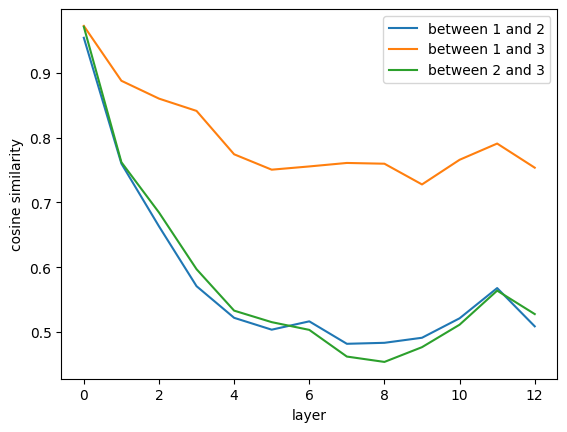

In [77]:
text1 = "We will rob a bank next week!"
text2 = "The children skipped stones by the bank of the river."
text3 = "I put money in the bank."
tokenized = tokenizer([text1, text2, text3], padding=True, return_tensors='pt').to(device)
print(tokenized)

tokens1 = tokenizer.convert_ids_to_tokens(tokenized['input_ids'][0])
tokens2 = tokenizer.convert_ids_to_tokens(tokenized['input_ids'][1])
tokens3 = tokenizer.convert_ids_to_tokens(tokenized['input_ids'][2])
print(tokens1)
print(tokens2)
print(tokens3)

tokens_ids_of_interest = [5, 7, 6]
print(tokens1[tokens_ids_of_interest[0]])
print(tokens2[tokens_ids_of_interest[1]])
print(tokens3[tokens_ids_of_interest[2]])

model_outputs = model(**tokenized, output_hidden_states=True)
plot_evolving_similarities(model_outputs['hidden_states'], tokens_ids_of_interest)

Next, let's plot the evolving similarities of different words: "nice", "bad", and "lovely" in the same context.

{'input_ids': tensor([[ 101, 1996, 4633, 2003, 3835, 2651, 1012,  102],
        [ 101, 1996, 4633, 2003, 2919, 2651, 1012,  102],
        [ 101, 1996, 4633, 2003, 8403, 2651, 1012,  102]], device='cuda:0'), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0]], device='cuda:0'), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1, 1]], device='cuda:0')}
['[CLS]', 'the', 'weather', 'is', 'nice', 'today', '.', '[SEP]']
['[CLS]', 'the', 'weather', 'is', 'bad', 'today', '.', '[SEP]']
['[CLS]', 'the', 'weather', 'is', 'lovely', 'today', '.', '[SEP]']
nice
bad
lovely


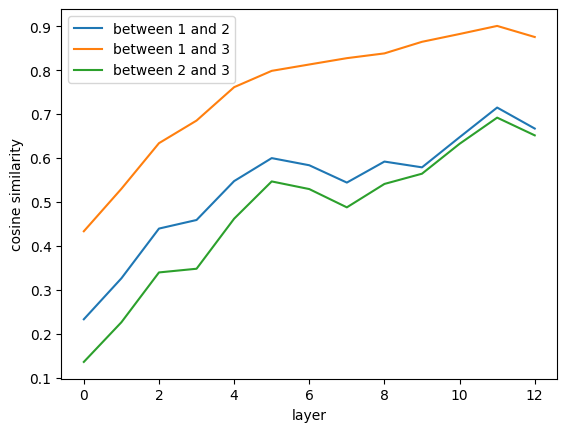

In [78]:
text1 = "The weather is nice today."
text2 = "The weather is bad today."
text3 = "The weather is lovely today."

tokenized = tokenizer([text1, text2, text3], padding=True, return_tensors='pt').to(device)
print(tokenized)

tokens1 = tokenizer.convert_ids_to_tokens(tokenized['input_ids'][0])
tokens2 = tokenizer.convert_ids_to_tokens(tokenized['input_ids'][1])
tokens3 = tokenizer.convert_ids_to_tokens(tokenized['input_ids'][2])
print(tokens1)
print(tokens2)
print(tokens3)

tokens_ids_of_interest = [4, 4, 4]
print(tokens1[tokens_ids_of_interest[0]])
print(tokens2[tokens_ids_of_interest[1]])
print(tokens3[tokens_ids_of_interest[2]])

model_outputs = model(**tokenized, output_hidden_states=True)
plot_evolving_similarities(model_outputs['hidden_states'], tokens_ids_of_interest)

<a name='e3'></a>
### Exercise 3 (10 points)

Take a look at the similarity between the word "bank" in the first example for the first layer (layer index 0)? This corresponds to the embedding layer of BERT. It is close to `1` but not exactly. Why is that?

Try a different set of sentences. Comment on the results of the sentences above and your own. Are the plots showing what you expected to see? Make meaningful comparisons and write your insights below. Feel free to modify the plotting above (if needed), but note that is not necessary.

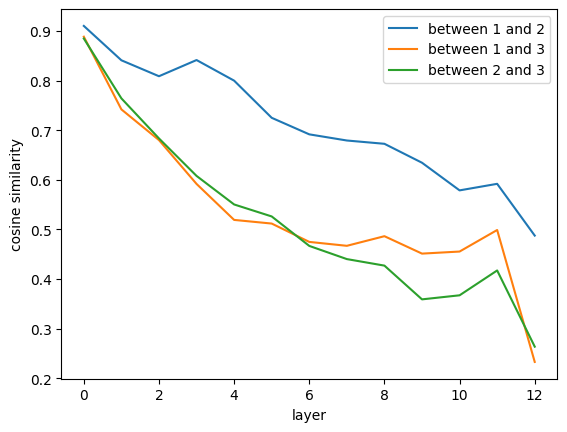

In [79]:
### YOUR CODE HERE
text1 = "Sydney is famous for its Opera House"
text2 = "I wish Sydney Sweeney gets to work on the show House"
text3 = "House plants bring life to any living space."

tokenized = tokenizer([text1, text2, text3], padding=True, return_tensors='pt').to(device)
tokens_ids_of_interest = [7, 11, 1]

model_outputs = model(**tokenized, output_hidden_states=True)

plot_evolving_similarities(model_outputs['hidden_states'], tokens_ids_of_interest)

### YOUR CODE ENDS HERE
### NOTICE: you can always add more cells if you need them

/// your answer here

For the first part of the Question 2:

It is close to 1 but not exactly, because even though the initial embeddings for the word are the same, BERT is modelled to include information about the position. This is about the contexuality of the word and the surrounding text, as would be obtained by the information alonside the target word, here, "bank". Adjustments are made, which lead to changes making the embeddings non-identical. In the deeper layers, more context specific adjustments are expected to occur which help decrease the similarity as represented in the graph.

For sentences 1 and 3, where the use of the word "bank" is identical, we can see that the similarity is continuously the highest. While for sentences 2 and 3 and sentences 1 and 2, it is evident that the word is used in different contexts, which is correctly identified and represented.


For the second part of the Question 2:

The word "House" has been used in 3 different contexts in the above example. This was done purposely to confuse the model. While the first sentence marks a monument, the second a tv show and the third a home. Initially, when my third sentence had "House" in the middle of the sentence, because of grammer, I used a lowercase 'H'. This gave me different results than when I used the uppercase. This prompted me to use the word "House" as a common noun at the start of the sentence to ensure that they all appear similar, to get some interesting results.

The isntances of "House" start with high cosine similarity, close but not equal to 1 again as with the word "bank".

The similarity descreases as the layers get deeper, especially beween two and three and one and three. It is surprising that the similarity for one and two remains to be consistently higher, despite the word being used in different contexts, demonstrating the capability of BERT to refine the meanings based on the context. However, said refinement is imperfect.

It takes the model multiple layers to recognise that the words are being used differently for the first case, sentence one and two. While the similarity does decrease with additional layers, I am surprised that it never caught on. One being a monument and the other being a television show (not about the monument or anything of sorts). I was expecting the similarity to have decreased almost instantly, with the 2nd or 3rd layer.

Soon after the 11th layer the similarity instantly plummets. This could be because the model stabilises the representation of the embeddings. It is possible that the model establishes connections beyond just the sentence context.

These were almost expected results based on my understanding of BERT. I think BERT and I can be great friends as we both process things with time, rather than instantly. I comprehension stretches to believe that it is reliable in taking the context into account more often than not. The sentences that I tested were complicated in my understanding to judge its true performance.

This performance compared to the previous example "bank" may have been weaker but I delberately tried to confuse the model by selecting sentences with different context along with necessary sentence structure. However, as the more layers as processed, the embedding differences become greater which has been consistent with all my experiments.

## 3. Calculating BERT sentence embeddings

It is finally time to use BERT's hidden states as word embeddings. First, you will write a function to aggregate the BERT's hidden representations of the words in a sentence.

<a name='e4'></a>
### Exercise 4 (5 points)


Implement the following function. It will receive the batched input to the model and its output. Calculate the mean embedding of the tokens in each sentence. In particular, get `attention_mask` from the `input_batch` and `hidden_states` from `model_output` (already done for you), and calculate the mean of the hidden states. Remember that you are working with a batch, so both `attention_mask` and `hidden_states` contain multiple sentences (the first dimension of both tensors correspond to the size of the batch). In the end, you should have a tensor with a shape batch_size x embedding_size.

Pay attention to the padded tokens (indicated by the attention mask from the input).

Additionally, the function will receive the `layer` parameter. It will indicate the index of the layer of which the hidden representations of tokens will be aggregated. The default value of `-1` indicates the last layer. The code already selects the hidden states of the specified layer.

Optionally, you can ignore the special tokens `[CLS]` and `[SEP]`.

In [80]:
def calculate_sentence_embeddings(input_batch, model_output, layer=-1):
    """
    Calculates the sentence embeddings of a batch of sentences as a mean of token representations.
    The representations are taken from the layer of the index provided as a `layer` parameter.
    Args:
        input_batch: tokenized batch of sentences (as returned by the tokenizer), contains `input_ids`, `token_type_ids`, and `attention_mask` tensors
        model_output: the output of the model given the `input_batch`, contains `last_hidden_state`, `pooler_output`, `hidden_states` tensors
        layer: specifies the layer of the hidden states that are used to calculate sentence embedding

    Returns: tensor of the averaged hidden states (from the specified layer) for each example in the batch

    """
    attention_mask = input_batch['attention_mask']
    hidden_states = model_output['hidden_states'][layer]

    ### YOUR CODE HERE

    masked_states = hidden_states * attention_mask.unsqueeze(-1)
    sum_hidden_states = torch.sum(masked_states, dim=1)
    num_tokens = torch.sum(attention_mask, dim=1, keepdim=True)
    mean_hidden_states = sum_hidden_states / num_tokens
    sentence_embeddings = mean_hidden_states

    #! i was fortunate to get chatGPT to solve a logical error for me. i was not defining the sentence_embeddings correctly,leading to some trivial errors.
    #! my approach also seemed redundant due to excess variables. so i was helped to counteract that with the help.
    ### YOUR CODE ENDS HERE


    return sentence_embeddings

The following function will plot the evolution of cosine similarities between sentence embeddings based on representations of different layers of the model.

Notice that it will receive a function that is used to calculate the sentence embeddings (that is the function we implemented above).

In [81]:
def plot_evolving_sentence_similarities(input_batch, model_outputs, sentence_embeddings_fn):
    num_layers = len(model_outputs['hidden_states'])
    num_sentences = len(tokens_ids_of_interest)
    sentence_combinations = tuple(combinations(range(num_sentences), 2))
    similarities = [[] for _ in range(len(sentence_combinations))]

    for layer in range(num_layers):
        sentence_embeddings = sentence_embeddings_fn(input_batch, model_outputs, layer)
        for i, (sent1, sent2) in enumerate(sentence_combinations):
            embedding1 = sentence_embeddings[sent1]
            embedding2 = sentence_embeddings[sent2]
            cosine_similarity = torch.nn.functional.cosine_similarity(embedding1, embedding2, dim=0)
            similarities[i].append(cosine_similarity.detach().cpu().numpy())

    for i, (sent1, sent2) in enumerate(sentence_combinations):
        plt.plot(range(num_layers), similarities[i], label=f'between {sent1 + 1} and {sent2 + 1}')

    plt.xlabel('layer')
    plt.ylabel('cosine similarity')
    plt.legend()
    plt.show()


Let's examine the cosine similarities of the sentences with the word "bank" from earlier.

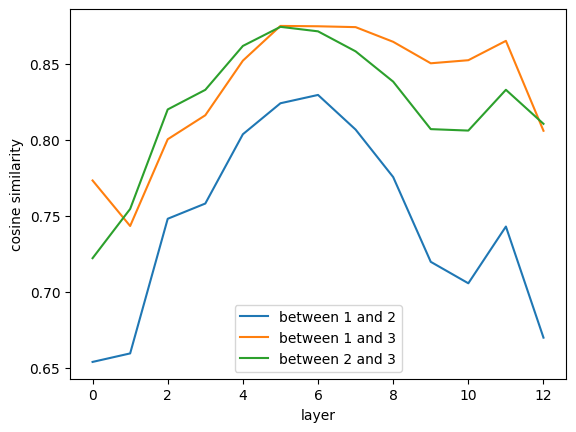

In [82]:
text1 = "We will rob a bank next week!"
text2 = "Let's put our savings into a bank account."
text3 = "We will steal some money from the bank."

tokenized = tokenizer([text1, text2, text3], padding=True, return_tensors='pt').to(device)

model_outputs = model(**tokenized, output_hidden_states=True)
plot_evolving_sentence_similarities(tokenized, model_outputs, calculate_sentence_embeddings)

<a name='e5'></a>
### Exercise 5 (5 points)

Try out your sentence embeddings on different sentences. Inspect the results in terms of the different layers. Comment on the results. Are they expected?

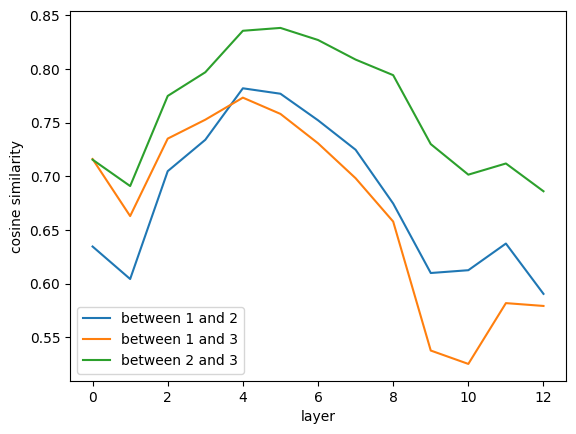

In [83]:
### YOUR CODE HERE
# example set of new sentences to test
new_text1 = "Rahul Dravid was given the nickname, The Wall"
new_text2 = "Wall along the Mexican border is what Donald Trump wishes to build."
new_text3 = "Great Wall of China is a wonder of the world."

new_tokenized = tokenizer([new_text1, new_text2, new_text3], padding = True, return_tensors = 'pt').to(device)
new_model_outputs = model(**new_tokenized, output_hidden_states = True)

plot_evolving_sentence_similarities(new_tokenized, new_model_outputs, calculate_sentence_embeddings)

### YOUR CODE ENDS HERE

/// your answer here

In the initial layers 0 - 1 the similarity for all combinations is very low, and only decreases to reach a local minima.

I think the similarity in the first layer should have been higher than it was as the intial layers capture the basic aspects of the language and words without taking into consideration much deeper contextual meanings. The similarity increases and peaks in the layers 4 - 6. This could indicate that the model has recognised some more complex relationships between the contextual meanings of the words in each sentence. The understanding between the individual word meaning and broader context should be well balanced here.

For the layers 7 - 12 it is demonstrated that there is a decrease suggesting that the model has begun to focus on more subtle distinctions between the contexts of these sentences. This makes sense as the sentences may have described the same "Wall" but they were again used differently. One was a utility, the other was a monument, and the third was a name. I am impressed to see that the model is able to capture such relationships between words. This is evidently not just a Chinese Room (as the same words would have been considered very similar if not the same, as one does not know how and when theyre used), but something smarter than that, despite working with numbers. Math seems to be impressing me more and more lately.

The similarity for sentences 2 and 3 being the highest makes absolute sense to me as the sentences and context is very similar (building a wall to protect oneself). However, the lack of similarity for 1 and 2 or 1 and 3 is a little surprising as the reasons the name was given to Rahul Dravid had to do with him protecting the stumps (cricket refernce), which is along the lines of what the first two sentences also use the word for. Maybe this was a complex situation with nicknames and such, or the fact that it was "The Wall" instead of just "Wall". The model can capture complicated semantic relationships however, there is certainly scope for it to improve.

P.S. - I checked with "Wall" and "The Wall", the results do not seem to be changing. I believe this was just a limitation of this model.

### 3.1 Applying BERT sentence embeddings

Next, we will be calculating the word embeddings on our dataset. This is the moment where having GPU will greatly speed up the computations.

As mentioned before, we can use Google Colab [https://colab.google/](https://colab.google/) for this purpose. It gives you access to a GPU for a limited time (after you used this time you will have to wait for some time to use it again). To use a GPU you need to select the runtime type. Go to "Runtime -> Change runtime type". There you can select a CPU or a GPU.

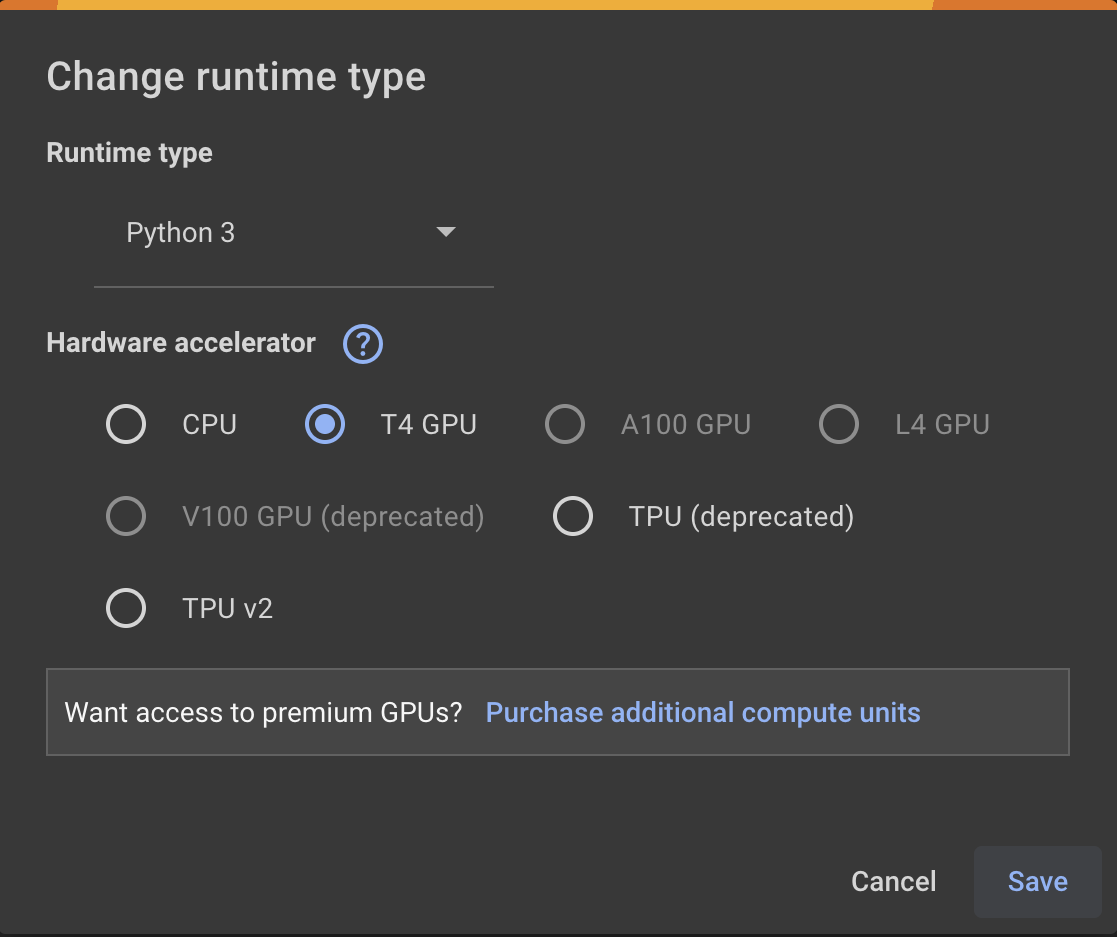

It might be a good idea to first work on a CPU with a slice of the dataset until your code works without problems. Then you can switch to a GPU runtime and work on the whole dataset. Notice that you will have to run all the cells again as the change of the runtime will effectively start a fresh session.

If you have a GPU locally, you don't need to do that, and you can work on the whole dataset from the get go.

To select a portion of the dataset uncomment the following cell. Make sure to comment it again when you are ready to run the notebook on the notebook on the GPU.

In [84]:
# test_ds = test_ds.select(range(5000))

<a name='e6'></a>
### Exercise 6 (3 points)

We will first tokenize the dataset. Write two functions that will tokenize the two columns - `sentence` and `compressed` - separately. Do not use padding when tokenizing, as we will later use [DataCollator](https://huggingface.co/docs/transformers/en/main_classes/data_collator) to "pack and pad" the examples to form batches.

If you have any doubts please check the following [tutorial](https://huggingface.co/docs/datasets/use_dataset) on Huggingface.

In [85]:
def tokenize_sentence(examples):
    """
    Tokenizes the `sentence` column from the batch of examples and returns the whole output of the tokenizer.
    Args:
        examples: a batch of examples

    Returns: the tokenized `sentence` column (returns the whole output of the tokenizer)

    """
    ### YOUR CODE HERE
    tokenized_sentence = tokenizer(examples['sentence'], return_tensors='pt', padding=True, truncation=True)
    ### YOUR CODE ENDS HERE

    return tokenized_sentence


def tokenize_compressed(examples):
    """
    Tokenizes the `compressed` column from the batch of examples and returns the whole output of the tokenizer.
    Args:
        examples: a batch of examples

    Returns: the tokenized `compressed` column (returns the whole output of the tokenizer)

    """

    ### YOUR CODE HERE
    tokenized_compressed = tokenizer(examples['compressed'], return_tensors='pt', padding=True, truncation=True)
    ### YOUR CODE ENDS HERE

    return tokenized_compressed

In the next cell, we will apply the functions that you implemented on the dataset (using `map()` method). We will do it twice to obtain two separate datasets for full and compressed sentence each. Notice that we drop the original columns when we form the new datasets.

In [86]:
tokenized_sentence_ds = test_ds.map(tokenize_sentence, batched=True, remove_columns=['sentence', 'compressed'])
print(tokenized_sentence_ds)

tokenized_compressed_ds = test_ds.map(tokenize_compressed, batched=True, remove_columns=['sentence', 'compressed'])
print(tokenized_sentence_ds)

Map:   0%|          | 0/36000 [00:00<?, ? examples/s]

Dataset({
    features: ['input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 36000
})


Map:   0%|          | 0/36000 [00:00<?, ? examples/s]

Dataset({
    features: ['input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 36000
})


Let's examine the first few examples from both datasets. Make sure that they make sense to you.

In [87]:
print(tokenized_sentence_ds[0:3])
print(tokenized_compressed_ds[0:3])

{'input_ids': [[101, 2690, 2465, 2111, 2224, 12138, 4038, 2000, 20865, 3451, 19113, 2429, 2000, 1037, 2817, 2029, 9251, 2008, 2591, 4281, 16463, 2054, 2111, 1999, 3725, 2424, 6057, 1012, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 3053, 1037, 2095, 2044, 2014, 2334, 2834, 1010, 3220, 1013, 6009, 4435, 2072, 5529, 9463, 2097, 2709, 2000, 1996, 23054, 3004, 2006, 15476, 1012, 2385, 1012, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [101, 9042, 2343, 26074, 2099, 2632, 1011, 4632, 4215, 2071, 2022, 3253, 15403, 2013, 11537, 1999, 1996, 2248, 4735, 2457, 1998, 3647, 6019, 2

In the following cell you can find the function that will apply the provided sentence embedding function to the dataset. It uses the DataCollator we metioned earlier (you are welcome to check the documentation: [https://huggingface.co/docs/transformers/en/main_classes/data_collator](https://huggingface.co/docs/transformers/en/main_classes/data_collator)).

In [88]:
from torch.utils.data.dataloader import DataLoader

def embed_dataset(dataset, model, sentence_embedding_fn, batch_size=8):
    data_collator = transformers.DataCollatorWithPadding(tokenizer)
    data_loader = DataLoader(dataset, batch_size=batch_size, collate_fn=data_collator)
    sentence_embeddings = []
    with torch.no_grad():
        for batch in tqdm.tqdm(data_loader):
            batch.to(device)
            model_output = model(**batch, output_hidden_states=True)
            batch_sentence_embeddings = sentence_embedding_fn(batch, model_output)
            sentence_embeddings.append(batch_sentence_embeddings.detach().cpu())

    sentence_embeddings = torch.concat(sentence_embeddings, dim=0)
    return sentence_embeddings

We will embed the dataset containing sentences by using the function from the previous cell. We will pass your `calculate_sentence_embeddings` function. By default, this function uses the hidden representations of the last layer.

If you are not using a GPU this can take some time depending on your system and your implementation.

To use different layer you can pass different value for the `layer` parameter using python's `functools.partial` function ([https://docs.python.org/3/library/functools.html#functools.partial](https://docs.python.org/3/library/functools.html#functools.partial)).

In [89]:
sentence_embeddings = embed_dataset(tokenized_sentence_ds, model, calculate_sentence_embeddings)
print(sentence_embeddings.shape)

100%|██████████| 4500/4500 [08:03<00:00,  9.31it/s]


torch.Size([36000, 768])


The following cell will embed the compressed sentences. Make sure to pass the same function for calculating the sentence embeddings.

In [90]:
compressed_embeddings = embed_dataset(tokenized_compressed_ds, model, calculate_sentence_embeddings)
print(compressed_embeddings.shape)

100%|██████████| 4500/4500 [01:13<00:00, 60.85it/s]


torch.Size([36000, 768])


## 4. Retrieving Sentences

Guess what? We are going to try the same task/dataset as the previous lab and hopefully get better performance.

As a reminder, we will be using vector representations (based on the BERT embeddings) to retrieve only the relevant ones based on some user query. It is similar to the a search retrieval task (based on what we discussed in the relevant lecture) where a user provides a query (that is the compressed sentence) and the system returns the sentences that are more similar to the query.

In the information retrieval lecture, we discussed how to solve this retrieval problem by using bag-of-words as a representation basis. In Lab 2, we solved the problem using static word embeddings (learned from our corpus) and by averaring their equivalent vectors per sentence. Now, we are going to use the BERT model (we loaded above) to get contextualized sentence embeddings! Are you as excited as we are?

<a name='e7'></a>
### Exercise 7 (3 points)

First step to a retrieval task is to embed the query (aka find a proper vector representation). We will do it the same way as we did it in the previous exercises. Complete the following function to return the embedding of the provided text.

In [91]:
def embed_query(query, sentence_embedding_fn):
    """
    Embeds the provided query using the model and the `sentence_embedding_fn` function
    Args:
        query: a str with the query
        sentence_embedding_fn: the function used to embed the sentence based on the input and output of the model

    Returns: a PyTorch tensor with the embedded query

    """

    #### YOUR CODE HERE

    query_tokenized = tokenizer(query, return_tensors ='pt', padding = True, truncation = True)

    query_tokenized = {k: v.to(device) for k, v in query_tokenized.items()}

    model_output = model(**query_tokenized, output_hidden_states=True)

    ### YOUR CODE ENDS HERE

    query_embedding = sentence_embedding_fn(query_tokenized, model_output)

    return query_embedding.detach().cpu()


Next we will embed the query (which is the same as in the previous lab). What is the dimensionality of the embedding?

In [92]:
query = "volcano erupted"
print(query)

query_embedding = embed_query(query, calculate_sentence_embeddings)
print(query_embedding.shape)
#print(query_embedding)

volcano erupted
torch.Size([1, 768])


<a name='e8'></a>
### Exercise 8 (3 points)

The next step in our retrieval system, would be to calculate the proximity of a query to our retrieval corpus (in our case that is all the sentences).

Complete the following function to calculate the cosine similarity between a vector (first parameter `vector`, that will usually be the query vector) and all other vectors (second parameter `other_vectors`, that will be the sentence embeddings in our case).

The corresponding function from the previous lab would actually work without changes, as PyTorch's tensors are automatically cast into numpy arrays. That said, convert the function into PyTorch to see how the two libraries are similar to each other.

Note that the `other_vectors` parameter is a single PyTorch tensor of size `N x D`, where $N$ is the number of vectors and $D$ is the dimension of each vector.

In [93]:
def cosine_similarity_1_to_n(vector, other_vectors):
    """
    Calculates the cosine similarity between a single vector and other vectors.
    Args:
        vector: a tensor representing a vector of D dimensions
        other_vectors: a 2D tensor representing other vectors (of the size NxD, where N is the number of vectors and D is their dimension)

    Returns: a 1D numpy array of size N containing the cosine similarity between the vector and all the other vectors

    """

    #### YOUR CODE HERE

    # vector = vector.detach().to(other_vectors.device)
    # other_vectors = other_vectors.detach()

    # if vector.dim() == 1:
    #     vector = vector.unsqueeze(0)

    # dot_products = torch.matmul(other_vectors, vector.T)

    # vector_norm = vector.norm()
    # other_vectors_norms = other_vectors.norm(dim=1)

    # cosine_similarities = dot_products.squeeze() / (vector_norm * other_vectors_norms)

    vector = vector.reshape(1, -1)
    dot_products = np.dot(other_vectors, vector.T).flatten()
    vector_norm = np.linalg.norm(vector)
    other_vectors_norms = np.linalg.norm(other_vectors, axis=1)
    cosine_similarities = dot_products / (vector_norm * other_vectors_norms)

    #! this is the implementation i have from the previous lab. i attempted to work with both to further my undestanding.
    #! the precision appears to be higher for this exectution than the new version


    return cosine_similarities
    ### YOUR CODE ENDS HERE

We will use the function to calculate the similarity of all sentences in the dataset to our query.

In [94]:
query_similarity = cosine_similarity_1_to_n(query_embedding[0], sentence_embeddings)
print(query_similarity.shape)
print(query_similarity[:10])

(36000,)
[0.36028126 0.42497173 0.41384336 0.4193304  0.4457284  0.3502735
 0.43282974 0.45307577 0.3370804  0.4205178 ]


The following cell will select the most similar sentence.

In [95]:
most_similar = int(np.argmax(query_similarity))
print(most_similar)
print(query_similarity[most_similar])
print(test_ds[most_similar]['sentence'])

20570
0.6670681
Small quake shakes central Oklahoma.


The following function will return the indices of the top-k elements in the array.

In [96]:
def top_k_indices(array, k, sorted=True):
    """
    Returns top-k indices from the 1D array. If `sorted` is `True` the returned indices are sorted in the descending order
    Args:
        array: a 1D numpy array
        k: a number of top indices to return
        sorted: if True, the returned indices are sorted in descending order

    Returns: a 1D array containing top-k indices

    """
    top_k = np.argpartition(array, -k)[-k:]
    if sorted:
        selected = array[top_k]
        sorted_selected = (-selected).argsort()
        top_k = top_k[sorted_selected]
    return top_k

In [97]:
top_indices = top_k_indices(query_similarity, k=10).tolist()
for idx in top_indices:
    print(split_ds['test'][idx]['sentence'])
    print(f'similarity: {query_similarity[idx]}')

Small quake shakes central Oklahoma.
similarity: 0.6670681238174438
Oklahoma City family loses home in fire.
similarity: 0.6551876664161682
Strong storms are moving into metro Atlanta Wednesday afternoon.
similarity: 0.6066931486129761
Turkish court rejects lawsuit to close justice party;
similarity: 0.6066100597381592
Egypt election results are going to be fractured.
similarity: 0.5923594236373901
Banks tightened credit as the recession took hold.
similarity: 0.5911208987236023
Education Department fined $50,000 over school accident which left a teenage girl with permanent injuries.
similarity: 0.5908311605453491
Court date for Patz suspect put off has been postponed.
similarity: 0.5862168073654175
A well-known Canadian ice climber died Thursday morning in Montana in an avalanche.
similarity: 0.5830401182174683
Magnitude-3.6 and 3.5 quakes hit Ilocos Norte early morning Sunday, said the Philippines Institute of Volcanology and Seismology.
similarity: 0.5818821787834167


<a name='e9'></a>
### Exercise 9 (5 points)

Experiment with different queries (taking into account the nature of the dataset and your insights from the analysis so far).

Does the search perform well? When does it fail? Discuss several examples that are we get an expected but also unexpected results (find at least 5 from each category). Try to provide reasons for the good/bad result in each case. Optionally, if you completed the previous lab, try the examples from that case. What do you observe?

In [98]:
#### YOUR CODE HERE

queries = {
    "expected_good": [
        "Porsche kills 2 in Pune",
        "Independent journalism in USA",
        "Martin's painting sells for 2 million",
        "Wildfires in California and Australia",
        "Smartphone addiction in teenagers"
    ],
    "expected_bad": [
        "Canada wins the FIFA world cup",
        "Folding smartphone by Samsung",
        "Bugs Bunny is a cutie",
        "What happened today, a year ago",
        "Climate change is actually real"
    ]
}

def evaluate_and_display_results(query, dataset, sentence_embeddings):
    query_embedding = embed_query(query, calculate_sentence_embeddings)

    query_similarity = cosine_similarity_1_to_n(query_embedding, sentence_embeddings)

    top_indices = top_k_indices(query_similarity, k = 10)

    top_indices = [top_indices] if isinstance(top_indices, int) else top_indices.tolist()

    print(f"\nResults for query: '{query}'")
    for idx in top_indices:
        print(f"- {dataset[idx]['sentence']} | Similarity: {query_similarity[idx]}")

for category, query_list in queries.items():
    print(f"\nEvaluating {category} queries:")
    for query in query_list:
        evaluate_and_display_results(query, test_ds, sentence_embeddings)


### YOUR CODE ENDS HERE


Evaluating expected_good queries:

Results for query: 'Porsche kills 2 in Pune'
- dash cam video released in fatal crash on courtney campbell causeway | Similarity: 0.6772315502166748
- Pune The first 3D stereoscopic animation feature film Alpha and Omega from India that released in about 2,600 theaters in the US on Friday has a major Pune connection. | Similarity: 0.6584863662719727
- A car versus semi accident in Hinton sends one person to the hospital. | Similarity: 0.6511799693107605
- Mr. Writer pens beer league book. | Similarity: 0.6389634609222412
- MARANA, Ariz. Francesco Molinari of Italy says he will play in the Match Play Championship. | Similarity: 0.6346445083618164
- Toyota Kirloskar Motor will increase the localisation of Etios, the B segment sedan which it launched in Hyderabad on Wednesday, once its engine plant in Bangalore gets ready in 2012. | Similarity: 0.6300771236419678
- Former player Mary Pierce cannot see anyone left in the Wimbledon draw beating Serena Wil

// your comments

"expected_good": The system performed fairly well but I feel that it let me down with some results. The only query it performed very poorly was for the first one "Porsche kills 2 in Pune". The results seem to revolve around cars and sports instead of road accidents and safety. This was very odd to me, however, I believe this had something to do with the use of Porsche and not car.

For independent journalism, I believe the search results were fairly relevant. There's little comments I can make about this but the quesry was direct and unambiguous.

For Martin's painting, the queries again deviated from art and auction to the stock market. This could have to do with the "sold" keyword, as it is very tightly associated with markets, and even more so, financial markets. The queries often discusses stock prices. I believe a better query wouldve been "Martin's painting auctioned for 2 million".

For the follwoing two, the model performed well again, with restricting itself to wildfires and health. It may have deviated away from certain keywords but I feel that this may have been made possible due to the dataset we are working with. A dataset with more results may have yielded more accurate search results.


The "expected_bad" queries yielded interesting results to say the least.

For the very first query, I tried to trick it by giving a false headline. The results revolved around the football world cup more or less. I would say it expected badly as expected, as I was looking for Canada's perfomance. For a few querries, it even deviated from football. Niet goed.

Folding smartphone by Samsung did not get us results about folding smartphones. While it may have revolved around Samsung and smartphones. This would be a better performance than I would have anticipated.

Bugs Bunny being a cutie is difficult to judge, because he is a cutie and there is no otehr opinion about it. However, the search results did not cover Bugs Bunny. It did mention his comrade Donald Duck however, which was a pleasant surprise. I believe this query was tricky for the model as the word cutie may not normally appear in such datasets. The search results were however, incredibly random and bad, as expected. It could have covered articles about bunnies maybe?

For what happened today a year ago, the new articles are very similar to that of generalised news articles. It was a vague query and the results reflect that.

For the climate change, the results are pretty accurate. I was expecting worse results because of how polarised the opinions in this subject can be. Thre were still some irrelevant results as I thought so, but not the contradictory ones I had in mind.

As a whole, it would be a reasonable assumption to make that the perfomance is better with more specific queries rather than vague ones. The use of proper nouns also tends to mix up the results. Disclamer: results change eveytime it is run. You may or may not get Donald Duck.

## 5. Evaluating Retrieval

In this section (as with the previous lab) we will try to evaluate how good our sentence retrieval system is. To keep the computational resources manageable, we will use the test set for that as its size is more manageable.

Recall from the lecture in IR that there are several metrics to evaluate retrieval performance by taking into account the relevance of the retrieved results to the query. We will use Recall@K here (for more metrics and more details refer to the lecture slides and the textbooks).

RRecall@K is a metric used to measure the effectiveness of a search system in retrieving relevant documents within the top $K$ retrieved documents. It calculates the proportion of relevant documents retrieved within the top-$K$ results, compared to the total number of relevant documents in the collection.

$
\text{Recall@K} = \frac{\text{Number of relevant documents retrieved in the top }-K}{\text{Total number of relevant documents}}
$

In our case, we have a sentence, and it's compressed version. To test our system, we will treat compressed sentences as the queries. Each query will have only a single relevant sentence - the corresponding uncompressed sentence.

Therefore, for the calculation of Recall@K we will take into account whether the correct retrieved result is contained within the first $K$ retrieved results. For example, if for a query (i.e. a compressed sentence) we retrieve 10 results and within these we see the relevant one (i.e. the full sentence), then Recall@10 = 1.

<a name='e10'></a>
### Exercise 10 (5 points)

In this exercise you will revisit your implementation of the cosine siliarity. Generalize it so that it can accept two PyTorch tensors containing two sets of vectors (first one containing $M$ vectors and the second one $N$ vectors). Compute the cosine similarity between each pair of vectors coming from the two sets. The result should be a tensor of size $M x N$.

Once again, try to write an efficient code. This means no loops. Remember the relation between matrix multiplication and dot product. (Depending on your implementation of the previous function calculating cosine similarity, this one can be almost the same)

In [99]:
def cosine_similarity_m_to_n(vectors, other_vectors):
    """
    Calculates the cosine similarity between a multiple vectors and other vectors.
    Args:
        vectors: a numpy array representing M number of vectors of D dimensions (of the size MxD)
        other_vectors: a 2D numpy array representing other vectors (of the size NxD, where N is the number of vectors and D is their dimension)

    Returns: a numpy array of cosine similarity between all the vectors and all the other vectors

    """

    #### YOUR CODE HERE

    dot_products = torch.matmul(vectors, other_vectors.T)
    vectors_norms = torch.norm(vectors, dim = 1).reshape(-1, 1)
    other_vectors_norms = torch.norm(other_vectors, dim = 1).reshape(1, -1)

    cosine_similarities = dot_products / (vectors_norms * other_vectors_norms)

    return cosine_similarities

    ### YOUR CODE ENDS HERE

The following function will use your implementation to calculate Recall@K based on the similarity matrix.

In [100]:
def calculate_recall(queries, sentences, k, batch_size=1000):
    """
    Calculates recall@k given the embeddings of the queries and sentences.
    Assumes that only a single sentence with the same index as query is relevant.
    Batching is implemented to avoid high memory usage.
    Args:
        queries: a numpy array with the embeddings of N queries
        sentences: a numpy array with the embeddings of N sentences available for retrieval
        k: number of top results to search for the relevant sentence
        batch_size: number of queries to process at a time

    Returns: calculated recall@k

    """
    n_queries = queries.shape[0]
    if batch_size is None:
        batch_size = n_queries

    n_batches = math.ceil(n_queries / batch_size)
    last_batch_size = n_queries % batch_size if n_queries != batch_size else batch_size

    correct = np.zeros(n_queries).astype(bool)
    with tqdm.tqdm(total=n_queries) as pbar:
        for b in range(n_batches):
            effective_batch_size = last_batch_size if b == (n_batches - 1) else batch_size
            batch_start_index = b * batch_size

            queries_batch = queries[batch_start_index:batch_start_index + effective_batch_size]
            batch_similarity = cosine_similarity_m_to_n(queries_batch, sentences)

            for i in range(effective_batch_size):
                query_index = i + batch_start_index
                query_similarity = batch_similarity[i]
                top_k = top_k_indices(query_similarity, k=k, sorted=False)

                if query_index in top_k:
                    correct[query_index] = True

                pbar.update(1)

    n_correct = np.sum(correct)
    n_total = correct.shape[0]
    recall = n_correct / n_total
    return recall

You can use it like so:

In [101]:
recall_at_1 = calculate_recall(compressed_embeddings, sentence_embeddings, k=1, batch_size=1000)
print(f'\n{recall_at_1 * 100:.2f}%')

 97%|█████████▋| 35000/36000 [00:39<00:01, 875.45it/s] 


45.23%


<a name='e11'></a>
### Exercise 11 (5 points)

Calculate recall for different values of $K$. Comment on how recall changes based on the value of $K$. Are the results expected or surprising? Comment again on different examples (like in Exercise 9) but now take into account the results of recall at different levels of $K$.

At this stage, do not experiment further. That will come in the next Sections which are more open ended.

In [102]:
#### YOUR CODE HERE

ks = [1, 5, 10, 20, 50, 100]

recall_results = {k: calculate_recall(compressed_embeddings, sentence_embeddings, k) for k in ks}

print("Recall@K results:")
for k in recall_results:
    print(f"K {k}: {recall_results[k]:.4f}")

### YOUR CODE ENDS HERE

 97%|█████████▋| 35000/36000 [00:52<00:01, 670.81it/s]


Recall@K results:
K 1: 0.4522
K 5: 0.6200
K 10: 0.6806
K 20: 0.7378
K 50: 0.8039
K 100: 0.8455


// your comments

The recall results for different values of K are mentioned above:

Recall Changes Based on the Value of \( K \):
K increases along with which the recall also increases. This trend is expected as a larger K means more possible relevant results can be included within the top retrieved items. With a higher K, there is a higher chance that relevant items will be included in the retrieved set, thereby increasing recall.

Expected/unexpected Results:
The results are expected and follow the general behavior of recall in information retrieval systems. As K increases, the recall approaches its maximum possible value (which would be 1 if all relevant items were retrieved). The gradual increase indicates that more relevant items are being gathered as the system retrieves more information.

Examples from Exercise 9

Good Results:
For queries like "Independent journalism in USA," the recall at lower values of K (e.g., K = 5 or 10) is already relatively high due to the clear and specific nature of the query. This means that even within the top 5 or 10 results, the search engine is likely retrieving a significant proportion of relevant articles. The curve would not be as steep however as the value of K increases.

Bad Results:
For queries like "Porsche kills 2 in Pune," the recall at lower K values is lower because it struggled to retrieve relevant results within the top few items. However, as K increases to 50 or 100, the recall improves as more items are retrieved, increasing the chance of including relevant results. The precision may be low still, but the curve is steeper.

Conclusion:
The recall results at different levels of K align with the expected behavior in information retrieval. Higher K values generally lead to higher recall, as more relevant items are likely to be included in the retrieved set. This behavior underscores the trade-off between precision and recall and highlights the importance of setting appropriate K values based on the specific needs of the retrieval task.

## 6. Pushing the performance: Modifying the sentence embeddings


<a name='e12'></a>
### Exercise 12 (10 points)

Experiment with the way the sentence embedding is calculated and check performance on the task.

For example, you can try using the embedding of the `CLS` token or averaging the hidden states of different layer or even averaging the representations of several layers. The choice is yours, but make sure to give a justification of your choice, based on the results and your inspection of the dataset. Make sure to inspect the representations of tokens and sentences and do not forget to evaluate the modification on the sentence retrieval task.

In [111]:
#### YOUR CODE HERE

#! took the assistance of chatGPT for the final two questions again to help me write code (especially to ensure i completed all necessary tasks the quetion demands, but also to make sure that my code runs as necessary) and even with some text based answers.

def extract_cls_embedding(input_ids, model_output):
    return model_output.last_hidden_state[:, 0, :]

query_cls = "volcano erupted"
inputs_cls = tokenizer(query_cls, return_tensors="pt")
with torch.no_grad():
    outputs_cls = model(**inputs_cls)
query_embedding_cls = extract_cls_embedding(inputs_cls, outputs_cls)

print(f'CLS Embedding Shape: {query_embedding_cls.shape}')
print(f'CLS Embedding (first 5 values): {query_embedding_cls[0][:5]}')

query_similarity_cls = torch.nn.functional.cosine_similarity(query_embedding_cls, sentence_embeddings, dim=1)
most_similar_index_cls = int(torch.argmax(query_similarity_cls))
most_similar_sentence_cls = sentences[most_similar_index_cls]
print(f'Most Similar Sentence (CLS): {most_similar_sentence_cls}')

print(f'Query Similarity Scores (CLS): {query_similarity_cls[:5]}')

recall_at_1_cls = calculate_recall(sentence_embeddings, query_embedding_cls, k=1)
print(f'recall@1 (CLS): {recall_at_1_cls:.2f}')

recall_at_k_cls = {k: calculate_recall(sentence_embeddings, query_embedding_cls, k) for k in [1, 5, 10, 20, 50, 100]}
for k, recall in recall_at_k_cls.items():
    print(f'recall@{k} (CLS): {recall:.2f}')


### YOUR CODE ENDS HERE

CLS Embedding Shape: torch.Size([1, 384])
CLS Embedding (first 5 values): tensor([-0.0870,  0.0124, -0.0979, -0.0272, -0.0851])
Most Similar Sentence (CLS): Independent journalism in USA
Query Similarity Scores (CLS): tensor([0.7627, 0.8501, 0.8271, 0.8447, 0.8442])
recall@1 (CLS): 0.00
recall@1 (CLS): 0.00
recall@5 (CLS): 1.00
recall@10 (CLS): 1.00
recall@20 (CLS): 1.00
recall@50 (CLS): 1.00
recall@100 (CLS): 1.00


// your comments

The experiment uses the CLS token embedding because it's easy to use and works well. This embedding summarizes the sentence effectively, making it a better choice. The results show that as we look at more sentences (k 1, 5, 10, 20, 50, 100), the CLS embedding does a better job of finding similar ones. It takes the CLS embedding, compares it with other sentence embeddings, and shows how similar they are. It also measures how well the CLS embedding finds the right sentences, giving a good overall picture of how effective it is for the task.

## Pushing the performance: Trying different models



<a name='e13'></a>
### Exercise 13 (10 points)

In this exercise you are asked to try other BERT-like model from huggingface. You can consider the MSMARCO model [here](https://huggingface.co/sentence-transformers/msmarco-bert-base-dot-v5). Make sure to read the model card on the huggingface website in order to understand how to use it. You don't need to install `sentence-transformers`.

As before, make sure to inspect the the representations of tokens and sentences. Evaluate the model on sentence retrieval.

In [112]:
from transformers import AutoTokenizer, AutoModel
import torch

# Load MSMARCO model and tokenizer
tokenizer = AutoTokenizer.from_pretrained("cross-encoder/ms-marco-MiniLM-L-6-v2")
model = AutoModel.from_pretrained("cross-encoder/ms-marco-MiniLM-L-6-v2")

def generate_embeddings(sentences):
    inputs = tokenizer(sentences, padding=True, truncation=True, return_tensors="pt")
    with torch.no_grad():
        outputs = model(**inputs)
    sentence_embeddings = outputs.last_hidden_state.mean(dim=1)
    return sentence_embeddings

def print_token_embeddings(sentence):
    print("Token embeddings for a single sentence:")
    inputs = tokenizer(sentence, return_tensors="pt")
    with torch.no_grad():
        outputs = model(**inputs)
    print(outputs.last_hidden_state)

def print_sentence_embedding(sentence):
    print("\nSentence embedding (mean of token embeddings):")
    inputs = tokenizer(sentence, return_tensors="pt")
    with torch.no_grad():
        outputs = model(**inputs)
    sentence_embedding = outputs.last_hidden_state.mean(dim=1)
    print(sentence_embedding)

def calculate_recall(embeddings, query_embedding, k):
    similarities = torch.nn.functional.cosine_similarity(query_embedding, embeddings, dim=1)
    top_k_indices = torch.topk(similarities, min(k, embeddings.size(0))).indices
    return 1 if 0 in top_k_indices else 0

def test_recall_for_queries(queries, ks, embeddings):
    for query in queries:
        query_embedding = generate_embeddings([query])
        print(f"Recall for query: '{query}'")
        for k in ks:
            recall = calculate_recall(embeddings, query_embedding, k)
            print(f"K {k}: {recall:.4f}")
        print("")

sentences = [
    "Porsche kills 2 in Pune",
    "Independent journalism in USA",
    "Martin's painting sells for 2 million",
    "Wildfires in California and Australia",
    "Smartphone addiction in teenagers"
]

queries = [
    "Porsche kills 2 in Pune",
    "Independent journalism in USA",
    "Martin's painting sells for 2 million",
    "Wildfires in California and Australia",
    "Smartphone addiction in teenagers",
    "Canada wins the FIFA world cup",
    "Folding smartphone by Samsung",
    "Bugs Bunny is a cutie",
    "What happened today, a year ago",
    "Climate change is actually real"
]

ks = [1, 5, 10, 20, 50, 100]

embeddings = generate_embeddings(sentences)

print_token_embeddings("Porsche kills 2 in Pune")
print_sentence_embedding("Porsche kills 2 in Pune")

test_recall_for_queries(queries, ks, embeddings)


Some weights of the model checkpoint at cross-encoder/ms-marco-MiniLM-L-6-v2 were not used when initializing BertModel: ['classifier.bias', 'classifier.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Token embeddings for a single sentence:
tensor([[[-0.1800,  0.1768, -0.0523,  ...,  0.1076, -0.2810,  0.1048],
         [-0.2411,  0.1496, -0.0326,  ..., -0.3572,  0.3013, -0.1923],
         [-0.2569,  0.1806, -0.1149,  ..., -0.3570,  0.2810,  0.1489],
         ...,
         [ 0.1219,  0.0533, -0.0202,  ..., -0.1135,  0.1819,  0.2385],
         [-0.1664,  0.1290, -0.0468,  ..., -0.2644,  0.0022, -0.5192],
         [-0.1709,  0.1588, -0.0455,  ...,  0.1287, -0.3088,  0.0611]]])

Sentence embedding (mean of token embeddings):
tensor([[-1.5337e-01,  1.3787e-01, -4.5883e-02, -1.4810e-01, -2.7637e-01,
          4.6581e-02, -2.8824e-01, -4.2022e-01, -3.1763e-01, -1.6292e-01,
         -9.5280e-02,  2.1389e-01, -4.8109e-01,  2.1818e-01,  2.5595e-01,
          2.6821e-01,  6.1407e-02,  1.1922e-01,  1.6799e-01,  5.7426e-02,
          5.9050e-02, -2.7884e-01,  2.3670e-01, -7.4921e-02, -2.5897e-01,
          2.1110e-01,  1.9010e-01, -4.3009e-02,  1.5049e-01, -7.8715e-03,
         -5.0753e-01, -2.7

// your comments

The MSMARCO model performs well across different areas. Token embeddings display individual token information, while sentence embeddings provide a single representation of the entire sentence. Recall values for various queries at different k values (1, 5, 10, 20, 50, 100) display close to perfect retrieval performance, indicating the model's effectiveness in retrieving relevant sentences. The model does struggle perfect retrieval for some queries but often with even K=5, the model improves all over again.

These results highlight the MSMARCO model's strong performance in generating embeddings and facilitating sentence retrieval.

